## <div align=center>Song Popularity Predictor</div>
### <div align=center>By Teddy Nguyen and Steve Rein</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score, confusion_matrix

In [2]:
songs_df = pd.read_csv('data.csv')

In [3]:
songs_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [4]:
songs_df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


In [5]:
world_df = pd.read_csv('charts_with_audio_info.csv')

In [6]:
world_df.head()

,Unnamed: 0,Unnamed: 0.1,Position,Track Name,Artist,Streams,URL,country_code,country_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,0,1,Conversations,Juice WRLD,3452709,https://open.spotify.com/track/2fZTS0VboxRpF0F...,us,United States,0.747,0.622,11.0,-5.825,1.0,0.0838,0.1760,0.0,0.151,0.570,159.930
1,1,1,2,Come & Go (with Marshmello),Juice WRLD,3220828,https://open.spotify.com/track/7y7w4tl4MaRC2UM...,us,United States,0.625,0.814,0.0,-5.181,1.0,0.0657,0.0172,0.0,0.158,0.535,144.991
2,2,2,3,Life's A Mess (feat. Halsey),Juice WRLD,3094307,https://open.spotify.com/track/4h5N4KyWZMtpeH9...,us,United States,0.630,0.446,1.0,-8.900,1.0,0.0351,0.3370,0.0,0.166,0.177,143.078
3,3,3,4,Hate The Other Side (with Marshmello feat. Pol...,Juice WRLD,2855162,https://open.spotify.com/track/66FgjA5ZQJJuypF...,us,United States,0.701,0.650,6.0,-6.313,1.0,0.1040,0.2910,0.0,0.112,0.647,90.003
4,4,4,5,Titanic,Juice WRLD,2826000,https://open.spotify.com/track/1QoG0Yqz1onMsdb...,us,United States,0.568,0.545,1.0,-6.668,0.0,0.0447,0.1680,0.0,0.112,0.234,174.144


In [7]:
world_df.describe()

,Unnamed: 0,Unnamed: 0.1,Position,Streams,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,10982.000000,10982.000000,10982.000000,1.098200e+04,10962.000000,10962.000000,10962.000000,10962.000000,10962.000000,10962.000000,10962.000000,10962.000000,10962.000000,10962.000000,10962.000000
mean,5490.500000,5490.500000,97.665726,4.406471e+04,0.700209,0.642673,5.530560,-6.131556,0.572706,0.118329,0.257479,0.008065,0.171865,0.542633,122.855031
std,3170.374662,3170.374662,57.547283,1.295812e+05,0.128656,0.151319,3.707983,2.288677,0.494708,0.106048,0.237109,0.061420,0.135477,0.213945,30.085364
min,0.000000,0.000000,1.000000,1.004000e+03,0.176000,0.080000,0.000000,-18.782000,0.000000,0.023200,0.000055,0.000000,0.018100,0.038200,46.660000
25%,2745.250000,2745.250000,48.000000,4.718750e+03,0.625000,0.542000,2.000000,-7.352500,0.000000,0.045000,0.068600,0.000000,0.094300,0.381000,97.823000
50%,5490.500000,5490.500000,96.000000,1.201100e+04,0.717500,0.660000,6.000000,-5.842500,1.000000,0.075700,0.184000,0.000000,0.119000,0.547000,120.019000
75%,8235.750000,8235.750000,147.000000,4.040875e+04,0.794000,0.753000,9.000000,-4.563250,1.000000,0.159000,0.380000,0.000018,0.195000,0.708000,144.026000
max,10981.000000,10981.000000,200.000000,3.452709e+06,0.977000,0.990000,11.000000,1.509000,1.000000,0.881000,0.985000,0.966000,0.982000,0.978000,216.334000


## Data Cleaning

Check for null values

In [8]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

In [9]:
songs_df.isna().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [10]:
world_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10982 entries, 0 to 10981
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        10982 non-null  int64  
 1   Unnamed: 0.1      10982 non-null  int64  
 2   Position          10982 non-null  int64  
 3   Track Name        10982 non-null  object 
 4   Artist            10982 non-null  object 
 5   Streams           10982 non-null  int64  
 6   URL               10982 non-null  object 
 7   country_code      10982 non-null  object 
 8   country_name      10982 non-null  object 
 9   danceability      10962 non-null  float64
 10  energy            10962 non-null  float64
 11  key               10962 non-null  float64
 12  loudness          10962 non-null  float64
 13  mode              10962 non-null  float64
 14  speechiness       10962 non-null  float64
 15  acousticness      10962 non-null  float64
 16  instrumentalness  10962 non-null  float6

In [11]:
world_df.isna().sum()

Unnamed: 0           0
Unnamed: 0.1         0
Position             0
Track Name           0
Artist               0
Streams              0
URL                  0
country_code         0
country_name         0
danceability        20
energy              20
key                 20
loudness            20
mode                20
speechiness         20
acousticness        20
instrumentalness    20
liveness            20
valence             20
tempo               20
dtype: int64

In [12]:
# Remove tracks with Na values
world_df.dropna(inplace=True)

In [13]:
len(world_df)

10962

In [14]:
len(world_df) + 20 == 10982

True

In [15]:
# Only keep the track name and the country the song was from
world_df = world_df[['Track Name', 'country_name']]

In [16]:
world_df.columns = ['name', 'country']
world_df.head()

,name,country
0,Conversations,United States
1,Come & Go (with Marshmello),United States
2,Life's A Mess (feat. Halsey),United States
3,Hate The Other Side (with Marshmello feat. Pol...,United States
4,Titanic,United States


In [17]:
# Create a new DataFrame from merging songs_df with world_df
songs_w_country_df = songs_df.merge(world_df, how='left')

In [18]:
# Fill NaN values in the country column with 'Missing'
songs_w_country_df['country'].fillna('Missing', inplace=True)

In [19]:
songs_w_country_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,country
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928,Missing
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928,Missing
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928,Missing
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928,Missing
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928,Missing


## Data Descriptions

After cleaning the DataFrame songs_df, it contains one track/song per row. The columns are:
<ul>
<li><b>name</b>: Title of the track
<li><b>id</b>: Id of track generated by Spotify
<li><b>acousticness</b>: The relative metric of the track being acoustic (ranges [0-1])
<li><b>danceability</b>: The relative measurement of the track being danceable (ranges [0-1])
<li><b>energy</b>: The energy of track (ranges [0-1])
<li><b>duration_ms</b>: The length of the track in milliseconds (ms)
<li><b>instrumentalness</b>: The relative ratio of the track being instrumental (ranges [0-1])
<li><b>valence</b>: The positiveness of the track (ranges [0-1])
<li><b>tempo</b>: The tempo of the track in beats per minute (ranges ~[50-150])
<li><b>liveness</b>: The relative duration of the track sounding as a live performance (ranges [0-1])
<li><b>loudness</b>: The relative loudness of the track typically in the range [-60, 0] decibel (dB)
<li><b>speechiness</b>: The relative length of the track containing any kind of human voice (rangse [0-1])
<li><b>year</b>: The release year of the track (1921-2020)
<li><b>mode</b> The binary value representing whether the track starts with a major (1) chord progression or not (0)
<li><b>explicit</b>: The binary value whether the track contains explicit content (1) or not (0)
<li><b>key</b>: The primary key of the track encoded as integers between 0 and 11
<li><b>artists</b>: The list of artists credited for production of the track
<li><b>release_date</b>: The date of release of the track in yyyy-mm-dd, yyyy-mm, or even yyyy
<li><b>popularity</b>: The popularity of the song (ranges [0-100])
<li><b>popular</b>: Binary value that indicates whether a track is popular or not. This is the dependent variable that will be integrated after the data exploration.
</ul>

After cleaning the DataFrame world_df, it also contains one track/song per row. The columns are:
<ul>
<li><b>Track Name</b>: Title of the track
<li><b>Artist</b>: Artist of the track
<li><b>Streams</b>: Number of streams/plays
<li><b>country_code</b>: Unique country code idenitifer
<li><b>country</b>: Country the track originated from
<li><b>id</b>: Id of track generated by Spotify
<li><b>acousticness</b>: The relative metric of the track being acoustic (ranges [0-1])
<li><b>danceability</b>: The relative measurement of the track being danceable (ranges [0-1])
<li><b>energy</b>: The energy of track (ranges [0-1])
<li><b>instrumentalness</b>: The relative ratio of the track being instrumental (ranges [0-1])
<li><b>valence</b>: The positiveness of the track (ranges [0-1])
<li><b>tempo</b>: The tempo of the track in beats per minute (ranges ~[50-150])
<li><b>liveness</b>: The relative duration of the track sounding as a live performance (ranges [0-1])
<li><b>loudness</b>: The relative loudness of the track typically in the range [-60, 0] decibel (dB)
<li><b>speechiness</b>: The relative length of the track containing any kind of human voice (rangse [0-1])
<li><b>year</b>: The release year of the track (1921-2020)
<li><b>mode</b> The binary value representing whether the track starts with a major (1) chord progression or not (0)
<li><b>key</b>: The primary key of the track encoded as integers between 0 and 11
</ul>

After cleaning the DataFrame songs_w_country_df, it contains one track/song per row. The columns are the same as songs_df with the addition of the country column.

## Data Exploration

We want to explore the datasets further by looking at the feature importance, any trends in the dataset, and identifying optimal values for these features.

### Determine threshold for whether a song is considered popular or not

Text(0.5, 1.0, 'Popularity Distribution')

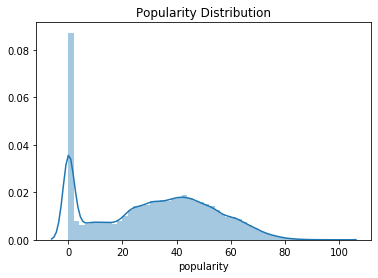

In [20]:
sns.distplot(songs_df.popularity, bins=50).set_title('Popularity Distribution')

In [21]:
# Check median instead of mean since the graph is skewed left due to high number of songs ranked 0 for popularity
songs_df.popularity.median()

33.0

In [22]:
# We noticed that the distribution was heavily skewed left near 0, 
# so we wanted to analyze that further by looking at the popularity of the songs by year
songs_df['year_bin'] = pd.cut(songs_df.year, 5)
songs_df.head(1)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,year_bin
0,0.995,['Carl Woitschach'],0.708,158648,0.195,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.151,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.779,1928,"(1920.901, 1940.8]"


Text(0.5, 1, 'Popularity By Years')

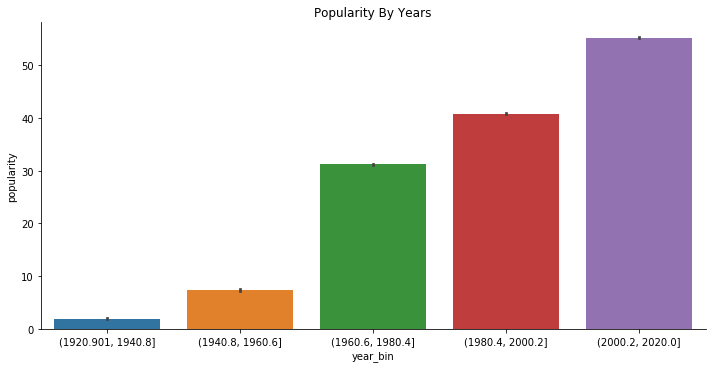

In [23]:
sns.catplot(x='year_bin', y='popularity', data=songs_df, kind='bar', aspect=2)
plt.title('Popularity By Years')

We decided songs before 1950 to be a good threshold to cut off and made a note about how the year seems to influence the popularity of a song.

In [24]:
songs_df.drop('year_bin', axis=1, inplace=True)

In [25]:
songs_df = songs_df[songs_df.year > 1950]
songs_df.shape

(139606, 19)

Text(0.5, 1.0, 'Popularity Distribution after 1950')

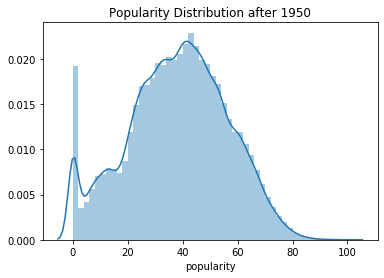

In [26]:
sns.distplot(songs_df.popularity, bins=50)
plt.title('Popularity Distribution after 1950')

In [27]:
# We define the threshold for whether a song is popular by the top 25% of popularity
songs_df.popularity.quantile(0.75)

51.0

Binarize popularity

In [28]:
threshold = songs_df.popularity.quantile(0.75)

In [29]:
songs_df.loc[songs_df.popularity < threshold, 'popular'] = 0
songs_df.loc[songs_df.popularity >= threshold, 'popular'] = 1

In [30]:
songs_df[songs_df.popular == 1]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,popular
3122,0.8910,['Lucio Dalla'],0.596,222160,0.305,0,3yGyWqmw9eCQPdJJ6iJLWs,0.000002,0,0.1920,-13.270,1,4/3/1943,54,1970,0.0460,134.381,0.782,1970,1.0
3366,0.7280,['Mia Martini'],0.248,283893,0.483,0,5UKMdUAChYAllKDye6qDGb,0.000004,9,0.6310,-11.279,1,Minuetto,58,1973-06-23,0.0678,191.107,0.439,1973,1.0
3386,0.6570,['Pescado Rabioso'],0.523,130080,0.169,0,689lBKIELtWGHfsPWpR6rv,0.000011,0,0.1150,-14.107,1,Todas las Hojas Son del Viento,54,1973-05-07,0.0403,76.049,0.392,1973,1.0
3441,0.9720,['Luiz Melodia'],0.526,169973,0.252,0,5JG0NigCZCt81My5Yizv1E,0.001700,5,0.1550,-9.801,1,Pérola Negra,52,1973-01-01,0.0556,105.469,0.312,1973,1.0
3832,0.0757,['Smokie'],0.594,245107,0.750,0,1r9QBciQVM1BnW72cQUA4R,0.000244,2,0.0593,-7.216,1,Lay Back in the Arms of Someone,52,1977,0.0299,122.949,0.693,1977,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.443,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.306,2020,1.0
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.385,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.270,2020,1.0
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.539,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.153,2020,1.0
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.761,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.472,2020,1.0


In [31]:
songs_df.popular.sum()

35839.0

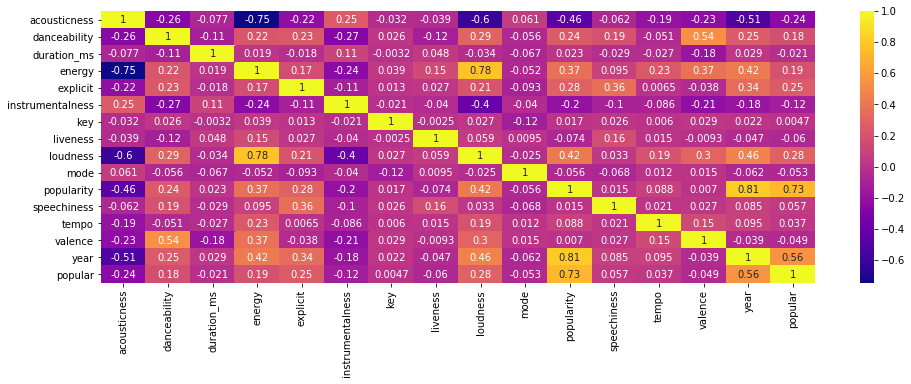

In [32]:
plt.figure(figsize=(16,5))
sns.heatmap(songs_df.corr(), annot=True, cmap = 'plasma')

Text(0.5, 1, 'Popularity by Country')

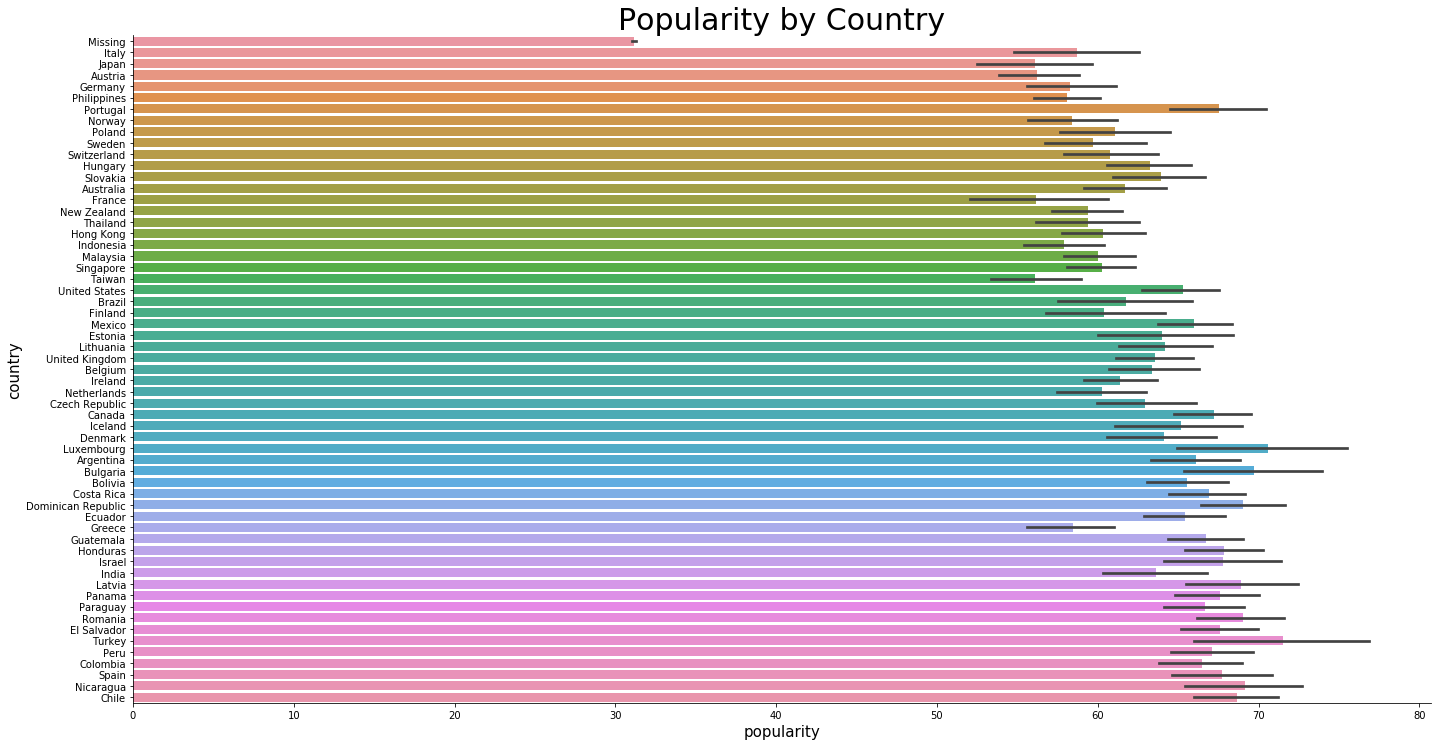

In [33]:
sns.catplot(x='popularity', y='country', data=songs_w_country_df, kind='bar', height=10, aspect=2)
plt.xlabel('popularity', size=15)
plt.ylabel('country', size=15)
plt.title('Popularity by Country', fontsize=30)

### Feature Selection

By ranking each feature, we can get a better idea of which features are more important/relevant to the popularity of the track. These features will serve as the inputs to the predictive classification model.

In [34]:
# Initialize input and output variables
# The input variables will include everything EXCEPT artists, id, name, release_date, popularity and popular columns
X = songs_df.drop(['artists', 'id', 'name', 'release_date', 'popularity', 'popular'], axis=1)
Y = songs_df.popular

In [35]:
model = DecisionTreeClassifier()

In [36]:
# Fit the model
model.fit(X, Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

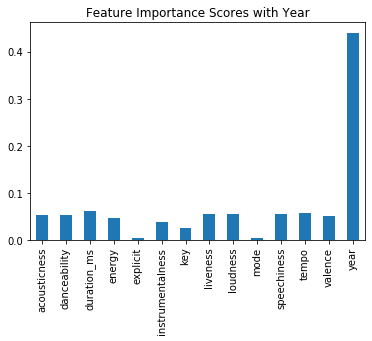

In [37]:
# Plot graph of feature importances for visualization
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.plot(kind='bar')
plt.title('Feature Importance Scores with Year')
plt.show()

Supporting our hypothesis from before, we again noticed that the year feature heavily influences the popularity which we realized was because Spotify essentially determines popularity by the number of plays the track has had and how recent those plays were. As a result, we decided to drop all features from the song/track that were not related music theory (i.e song or artist information)

In [38]:
# Input variables exlcudes year too
X = songs_df.drop(['year', 'artists', 'id', 'name', 'release_date', 'popularity', 'popular'], axis=1)
Y = songs_df.popular

In [39]:
model = DecisionTreeClassifier()

In [40]:
# Fit the model
model.fit(X, Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

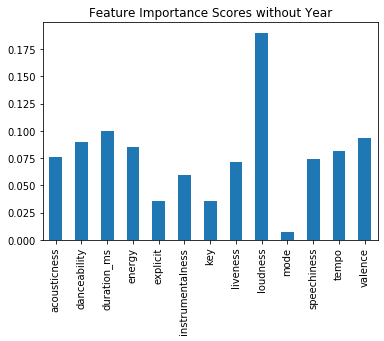

In [41]:
# Plot graph of feature importances for visualization
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.plot(kind='bar')
plt.title('Feature Importance Scores without Year')
plt.show()

We can now see the relevant features for our inquiry and get a better idea about which features will play an important role in our model's prediction

## Model Selection and Predicting

In [42]:
# Input variables exlcudes year too
X = songs_df.drop(['year', 'artists', 'id', 'name', 'release_date', 'popularity', 'popular'], axis=1)
# Output variable
Y = songs_df.popular

In [43]:
# List of Classifiers for predicting
clfs = [DecisionTreeClassifier(), RandomForestClassifier(n_jobs=-1),
        sk.linear_model.LogisticRegression(n_jobs=-1), QuadraticDiscriminantAnalysis(), KNeighborsClassifier()]

In [44]:
# List of features used 
print(X.columns.tolist())
features = X.columns.tolist()

['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence']


### Hold-out Sample Analysis

Split the data set 80/20 (80% training and the other 20% for testing)

In [45]:
train_data = songs_df.sample(frac=0.8, random_state=420)

In [46]:
X_train = train_data[features]
y_train = train_data.popular
X_test = songs_df.drop(train_data.index)[features]

Add a validation dataset 

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=420)

In [48]:
accuracy_ls = []
auc_ls = []

for clf in clfs:
    clf.fit(X_train, Y_train)
    y_predictions = clf.predict(X_test)
    
    accuracy = accuracy_score(Y_test, y_predictions)
    auc = roc_auc_score(Y_test, y_predictions)
    
    accuracy_ls.append(accuracy)
    auc_ls.append(auc)    

In [49]:
model_performance_hout_df = pd.DataFrame({'Model': ['DecisionTreeClassifier', 'RandomForestClassifier', 
                                                    'LogisticRegression', 'QuadraticDiscriminantAnalysis', 'KNeighborsClassifier'], 
                                          'Accuracy': accuracy_ls, 'AUC': auc_ls})

In [50]:
model_performance_hout_df.sort_values(by=['AUC', 'Accuracy'], ascending=False)

,Model,Accuracy,AUC
3,QuadraticDiscriminantAnalysis,0.770784,0.682773
1,RandomForestClassifier,0.795317,0.668552
0,DecisionTreeClassifier,0.710033,0.628337
4,KNeighborsClassifier,0.697990,0.528257
2,LogisticRegression,0.743162,0.506528


### Cross-Validation Analysis

In [51]:
nfolds = 10
accuracy_ls = []
auc_ls = []

for cl in clfs:
    kf = KFold(n_splits=nfolds, random_state=2, shuffle=True)
    
    accuracy = sk.model_selection.cross_val_score(cl, X, Y, cv=kf, scoring='accuracy').mean()
    auc = sk.model_selection.cross_val_score(cl, X, Y, cv=kf, scoring='roc_auc').mean()
    
    accuracy_ls.append(accuracy)
    auc_ls.append(auc)

In [52]:
model_performance_cval_df = pd.DataFrame({'Model': ['DecisionTreeClassifier', 'RandomForestClassifier', 
                                                    'LogisticRegression', 'QuadraticDiscriminantAnalysis', 'KNeighborsClassifier'], 
                                          'Accuracy': accuracy_ls, 'AUC': auc_ls})

In [53]:
model_performance_cval_df.sort_values(by=['AUC', 'Accuracy'], ascending=False)

,Model,Accuracy,AUC
1,RandomForestClassifier,0.799350,0.804955
3,QuadraticDiscriminantAnalysis,0.775017,0.762623
0,DecisionTreeClassifier,0.716294,0.636697
4,KNeighborsClassifier,0.701317,0.582126
2,LogisticRegression,0.743328,0.533031


We can see that the cross-validation method was more effective than hold-out sampling since the best AUC for cross-validation was higher than the best AUC for hold-out sampling.

## Results and Findings

RandomForestClassifier provided the best predictions on the training model with an AUC score of ~0.8. We decided to visualize the audio features of popular songs.

In [54]:
# We create a new DataFrame that only contains songs that are popular
popular_songs_df = songs_df[songs_df.popular == 1]

In [55]:
len(popular_songs_df)

35839

In [56]:
# Input variables exlcudes year too
X = songs_df.drop(['year', 'artists', 'id', 'name', 'release_date', 'popularity', 'popular'], axis=1)
# Output variable
Y = songs_df.popular

In [57]:
rf = RandomForestClassifier()

In [58]:
kf = KFold(n_splits=nfolds, random_state=2, shuffle=True)
# Get estimators for each combination of train-test folds
output = cross_validate(rf, X, Y, cv=kf, scoring='accuracy', return_estimator=True)

Features sorted by their score for fold 1


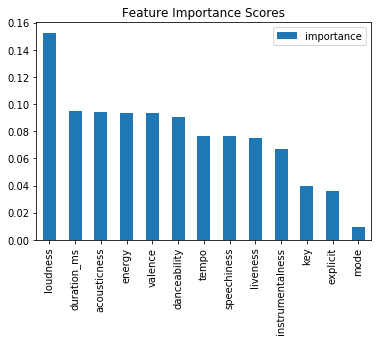

Features sorted by their score for fold 2


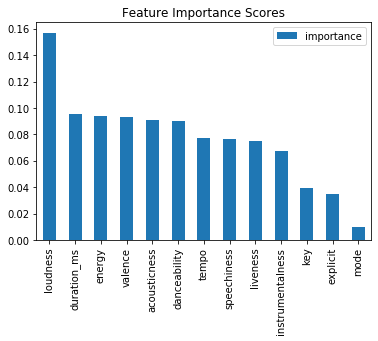

Features sorted by their score for fold 3


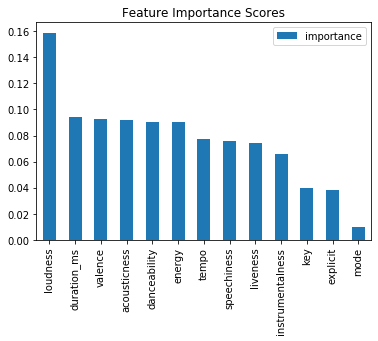

Features sorted by their score for fold 4


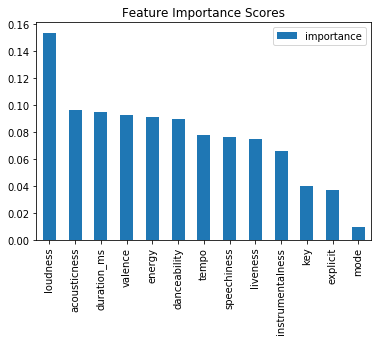

Features sorted by their score for fold 5


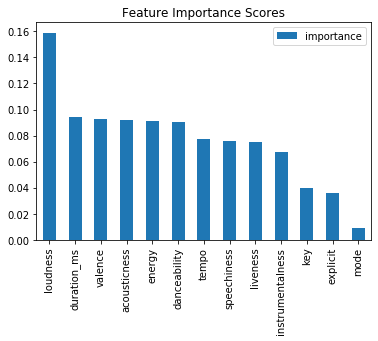

Features sorted by their score for fold 6


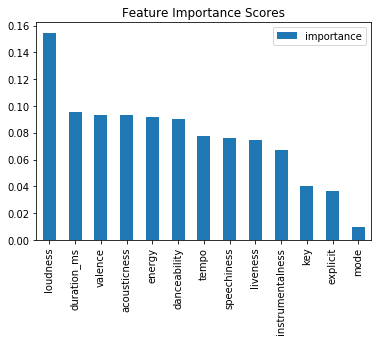

Features sorted by their score for fold 7


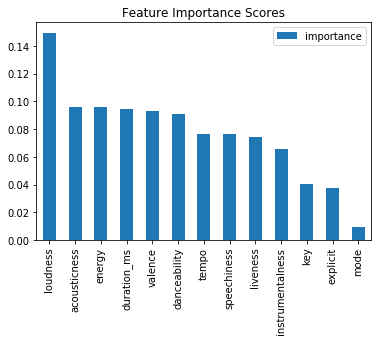

Features sorted by their score for fold 8


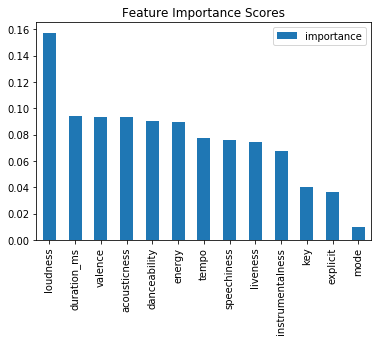

Features sorted by their score for fold 9


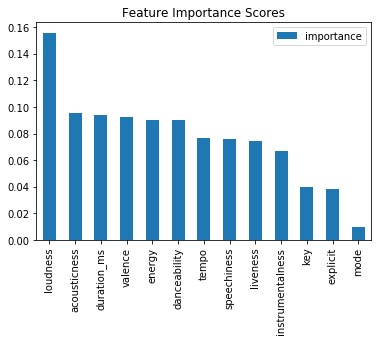

Features sorted by their score for fold 10


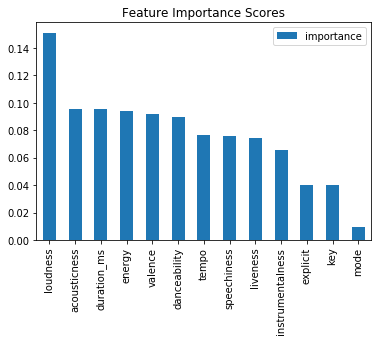

In [59]:
# List of DataFrames of the feature scores
fs_ls = []

# Visualize feature importance scores
for idx, estimator in enumerate(output['estimator']):
    print(f'Features sorted by their score for fold {idx + 1}')
    feature_importances = pd.DataFrame(estimator.feature_importances_,
                                      index=X.columns,
                                      columns=['importance']).sort_values('importance', ascending=False)
    # Plot each graph
    feature_importances.plot(kind='bar')
    plt.title('Feature Importance Scores')
    plt.show()
    
    fs_ls.append(feature_importances)

In [60]:
fs_avg_df = pd.concat(fs_ls).groupby(level=0).mean()

In [61]:
fs_avg_df.sort_values('importance', ascending=False, inplace=True)

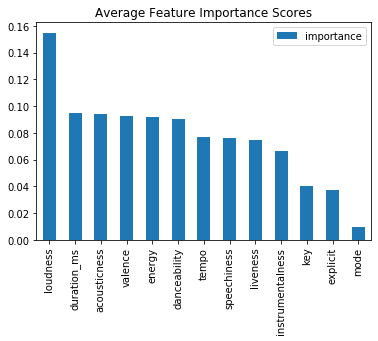

In [62]:
fs_avg_df.plot(kind='bar')
plt.title('Average Feature Importance Scores')
plt.show()